In [2]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
example2_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
f = request.urlopen(example1_url)
dataset_label = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)
f = request.urlopen(example2_url)
dataset_data = np.loadtxt(f, dtype=float, delimiter=",", skiprows=1)

### Curado de datos

In [3]:
indexado_dataset = dataset_label[:, 1] != ''
dataset_label = dataset_label[indexado_dataset, :]
dataset_data = dataset_data[indexado_dataset, 1:]
dataset_data

array([[1.82886662e+02, 0.00000000e+00, 1.20055143e+02, ...,
        7.83701850e+01, 1.19461428e+03, 4.01409910e+02],
       [1.69431590e+02, 4.54604059e+00, 2.98457567e+02, ...,
        1.08763407e+02, 9.26947063e+02, 5.44896122e+02],
       [3.31243786e+01, 1.71714935e+03, 1.71340081e+02, ...,
        2.73989941e+01, 5.10646098e+02, 1.82016428e+02],
       ...,
       [1.13639459e+02, 1.42854613e+00, 8.95608298e+01, ...,
        1.11931710e+02, 4.47587060e+02, 5.50732215e+02],
       [1.00944997e+02, 2.13602360e+02, 5.33707854e+02, ...,
        1.57624910e+02, 6.30222369e+02, 8.70856582e+02],
       [1.71543885e+01, 2.05935544e+01, 1.67400341e+02, ...,
        5.68453507e+01, 1.37337337e+02, 3.58139031e+02]])

### Modelo

In [4]:
X_train = dataset_data
y_train = dataset_label[:, 1:]
labels = {'healthy': 0, 'cancer': 1, 'post-surgery': 2, 'benign': 3}
for label in labels:
  y_train[y_train == label] = labels[label]
y_train = y_train.astype(int)
X_normalized = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=762))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.04),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=X_normalized, y=y_train, batch_size = 390, epochs=3000,callbacks=[es])

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 39ms/step - loss: 0.1419 - accuracy: 0.9846
Epoch 502/3000
1/1 [==============================] - 0s 46ms/step - loss: 0.1417 - accuracy: 0.9846
Epoch 503/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.1415 - accuracy: 0.9846
Epoch 504/3000
1/1 [==============================] - 0s 42ms/step - loss: 0.1413 - accuracy: 0.9846
Epoch 505/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.1410 - accuracy: 0.9846
Epoch 506/3000
1/1 [==============================] - 0s 27ms/step - loss: 0.1408 - accuracy: 0.9846
Epoch 507/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.1406 - accuracy: 0.9846
Epoch 508/3000
1/1 [==============================] - 0s 25ms/step - loss: 0.1404 - accuracy: 0.9846
Epoch 509/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.1402 - accuracy: 0.9846
Epoch 510/3000
1/1 [=========================

### Confusion matrix

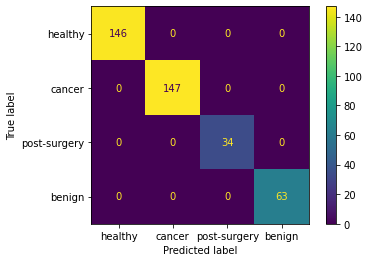

In [7]:
y_pred = np.argmax(model.predict(x=X_normalized), axis = 1).reshape(390, 1)


matrix = ConfusionMatrixDisplay.from_predictions(y_train, y_pred, display_labels = labels.keys())

### PCA

#### Parte 1

In [9]:
from sklearn import decomposition

X0 = X_train - np.mean(X_train, axis = 0)
n,dx=np.shape(X_train)
C=X0.T @ X0/n
ava, ave = np.linalg.eig(C)

In [10]:
ECM = []
for dim in range(1, dx + 1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM_iter = np.sum((X0-Xh)**2)/n
  ECM.append(ECM_iter)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


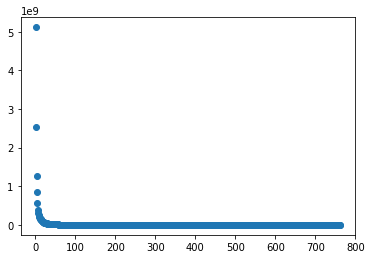

In [11]:
plt.scatter(list(range(1, dx + 1)), ECM)
plt.show()

#### Parte 2

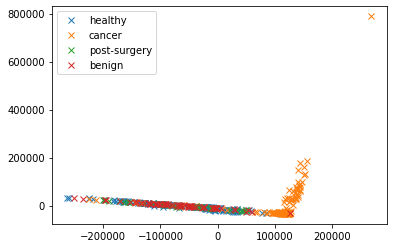

In [13]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
for name, label in [('healthy', 0), ('cancer', 1), ('post-surgery', 2), ('benign', 3)]:
  plt.plot(U[(y_train.T[0]==label).T, 0],U[y_train.T[0]==label,1],'x',label=name)
plt.legend()  
plt.show()

Aparenta ser más fácil de clasificar el grupo de los que tienen cáncer de próstata.